# DAG : NOTEARS
### PPO HalfCheetah with stable_baseline

1. Current state has no dag relationship
2. I assume the relatioship should be something like below, so only including previous step in the dag structure
$$\text{previous\_state} \rightarrow \text{current\_state}$$
$$\text{previous\_action} \rightarrow \text{current\_state}$$
$$\text{current\_state} \rightarrow \text{current\_action}$$
    

3. Considering the temporal relationship is not just one step ahead using temporal causal discovery method 

Dataset loaded successfully with shape: (2000, 48)

Descriptive statistics of the test data:
       current_reward   prev_reward  current_state_1  current_state_2  \
count    2.000000e+03  2.000000e+03     2.000000e+03     2.000000e+03   
mean    -5.684342e-17  4.263256e-17     4.263256e-17     2.309264e-17   
std      1.000250e+00  1.000250e+00     1.000250e+00     1.000250e+00   
min     -3.159540e+00 -2.836834e+00    -1.719902e+00    -1.799035e+00   
25%     -7.776617e-01 -7.647043e-01    -8.680618e-01    -8.403434e-01   
50%     -3.747250e-02 -3.289775e-02     9.230417e-03    -5.495064e-03   
75%      7.100988e-01  7.245875e-01     8.583979e-01     8.790374e-01   
max      2.467134e+00  2.433273e+00     1.705260e+00     1.700295e+00   

       current_state_3  current_state_4  current_state_5  current_state_6  \
count     2.000000e+03     2.000000e+03     2.000000e+03     2.000000e+03   
mean     -2.486900e-17     3.907985e-17     2.486900e-17     1.953993e-17   
std       1.000250

  0%|          | 0/230000.0 [00:00<?, ?it/s]


=== DAG Structure Evaluation ===

1. Basic Properties:
Number of nodes: 48
Number of edges: 75
Average degree: 3.12
Graph density: 0.03

2. Topological Properties:
Is DAG: True
Longest path length: 16

3. Connectivity:
Strongly connected components: 48
Weakly connected components: 20

4. Sparsity:
Sparsity ratio: 0.97

5. Edge Correlation Analysis:
Average edge correlation: 0.41
Max edge correlation: 0.91
Min edge correlation: 0.01

6. Node Centrality Measures:

Top 3 nodes by betweenness centrality:
prev_state_12: 0.034
current_action_4: 0.024
prev_state_9: 0.018


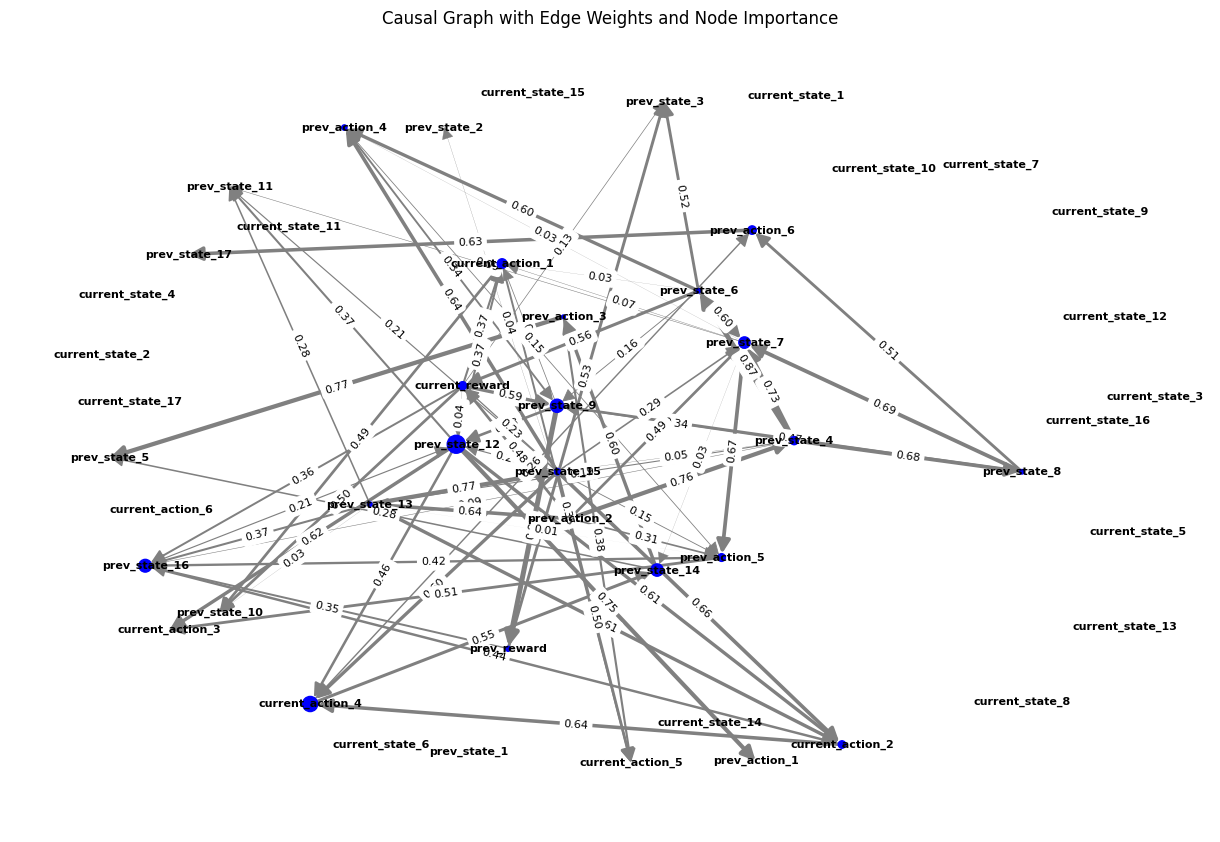


Edge Weights (Correlations):
prev_state_9 → prev_reward: 0.907
prev_state_4 → prev_state_6: 0.874
prev_state_13 → prev_state_15: 0.773
prev_action_3 → prev_state_5: 0.771
prev_action_2 → prev_state_4: 0.757
prev_state_12 → prev_action_1: 0.750
prev_state_4 → prev_state_7: 0.733
prev_state_8 → prev_state_7: 0.693
prev_state_4 → prev_state_8: 0.678
prev_state_7 → prev_action_5: 0.672
prev_state_15 → current_action_2: 0.657
prev_state_15 → prev_action_4: 0.642
prev_action_2 → prev_state_13: 0.642
current_action_2 → current_action_4: 0.636
prev_action_6 → prev_state_17: 0.635
prev_state_12 → current_action_3: 0.617
prev_state_13 → current_action_2: 0.614
prev_state_12 → current_action_2: 0.605
prev_state_6 → prev_state_7: 0.605
prev_state_14 → prev_action_3: 0.604
prev_state_15 → current_action_4: 0.598
prev_state_6 → prev_action_4: 0.598
current_reward → prev_state_9: 0.593
prev_state_6 → current_reward: 0.557
current_action_4 → prev_state_14: 0.551
prev_reward → prev_state_3: 0.527
prev

In [12]:
import pandas as pd
import numpy as np
from notears_dag import *
from dag_evaluation import *
from gran_dag import *


if __name__ == "__main__":
    file_path = "/home/richtsai1103/CRL/src/results/HalfCheetah-v5/ppo_20241212_020732/expanded_steps.csv"
    dataset = load_data(file_path)
    if dataset is not None:
        print("\nDescriptive statistics of the test data:")
        print(dataset.describe())
        
        print("\nCorrelation matrix:")
        print(dataset.corr())
        
        # Find and visualize relationships
        graph = find_relationships(dataset)
        if graph is not None:
            # Step 3: Evaluate the DAG structure
            metrics = evaluate_dag_structure(graph, dataset, nx.to_numpy_array(graph))
            print_evaluation_results(metrics)
            
            # Step 4: Visualize the relationships with weights
            visualize_graph_with_weights(graph, metrics, dataset)

# DAG: GraN-DAG

In [1]:
from dag_evaluation import *
from gran_dag import *

Dataset loaded successfully with shape: (2000, 48)
Epoch 100/3000
Reconstruction Loss: 0.1572
DAG Loss: 329627.7812
h(W): 65925.5547
-------------------
Epoch 200/3000
Reconstruction Loss: 0.0177
DAG Loss: 182399.6562
h(W): 36479.9297
-------------------
Epoch 300/3000
Reconstruction Loss: 0.0022
DAG Loss: 119631.9453
h(W): 23926.3887
-------------------
Epoch 400/3000
Reconstruction Loss: 0.0003
DAG Loss: 86140.0391
h(W): 17228.0078
-------------------
Epoch 500/3000
Reconstruction Loss: 0.0001
DAG Loss: 65790.1172
h(W): 13158.0234
-------------------
Epoch 600/3000
Reconstruction Loss: 0.0001
DAG Loss: 52325.7461
h(W): 10465.1494
-------------------
Epoch 700/3000
Reconstruction Loss: 0.0001
DAG Loss: 42863.8203
h(W): 8572.7637
-------------------
Epoch 800/3000
Reconstruction Loss: 0.0000
DAG Loss: 35909.2891
h(W): 7181.8574
-------------------
Epoch 900/3000
Reconstruction Loss: 0.0002
DAG Loss: 30617.0430
h(W): 6123.4087
-------------------
Epoch 1000/3000
Reconstruction Loss: 0.0

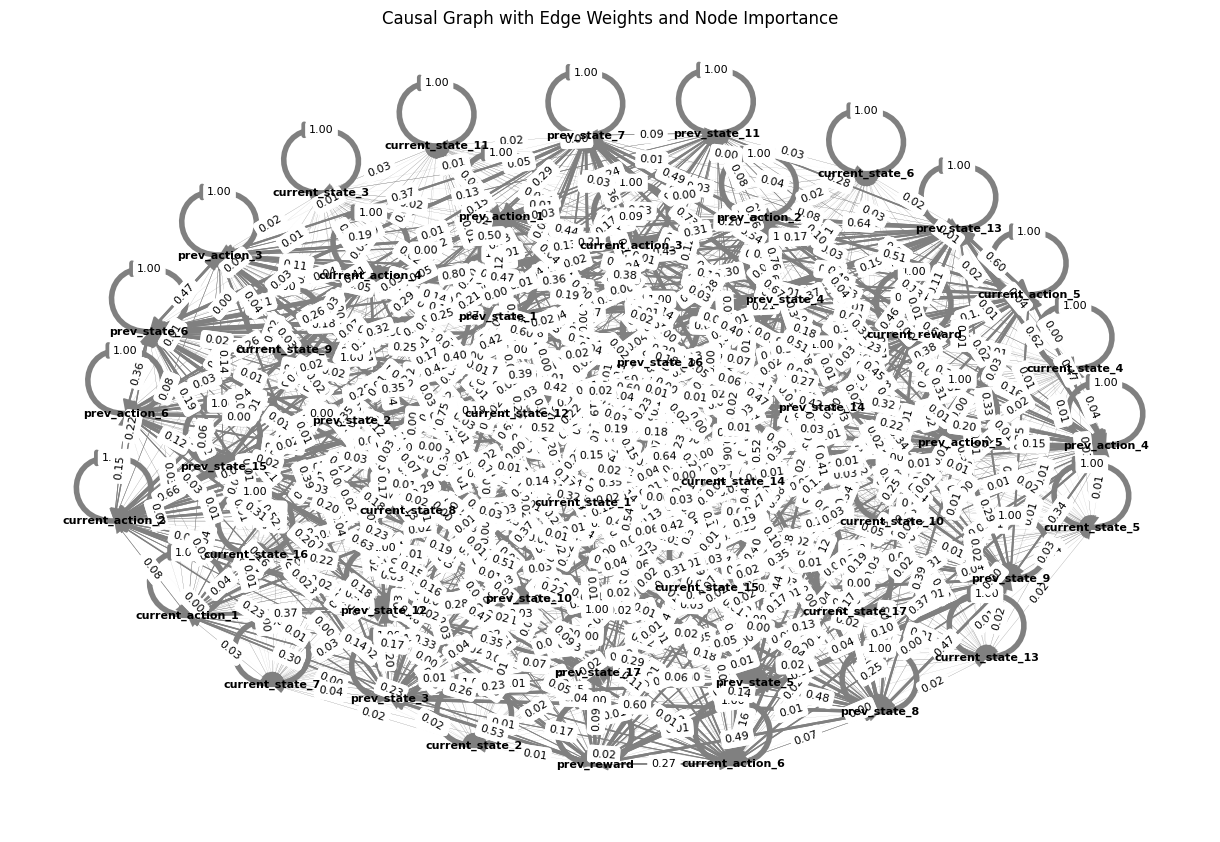


Edge Weights (Correlations):
current_reward → current_reward: 1.000
prev_reward → prev_reward: 1.000
current_state_1 → current_state_1: 1.000
current_state_2 → current_state_2: 1.000
current_state_3 → current_state_3: 1.000
current_state_4 → current_state_4: 1.000
current_state_5 → current_state_5: 1.000
current_state_6 → current_state_6: 1.000
current_state_7 → current_state_7: 1.000
current_state_8 → current_state_8: 1.000
current_state_9 → current_state_9: 1.000
current_state_10 → current_state_10: 1.000
current_state_11 → current_state_11: 1.000
current_state_12 → current_state_12: 1.000
current_state_13 → current_state_13: 1.000
current_state_14 → current_state_14: 1.000
current_state_15 → current_state_15: 1.000
current_state_16 → current_state_16: 1.000
current_state_17 → current_state_17: 1.000
current_action_1 → current_action_1: 1.000
current_action_2 → current_action_2: 1.000
current_action_3 → current_action_3: 1.000
current_action_4 → current_action_4: 1.000
current_actio

In [2]:
if __name__ == "__main__":
    
    file_path = "/home/richtsai1103/CRL/src/results/HalfCheetah-v5/ppo_20241212_020732/expanded_steps.csv"
    df = load_data(file_path)
    column_name = df.columns.tolist()
    dataset = torch.FloatTensor(df.values)
    
    # Create and train model
    model = GraNDAG(num_vars=dataset.shape[1])
    graph = train_gran_dag(model, dataset, column_name)
    
    if graph is not None:
        metrics = evaluate_dag_structure(graph, df, nx.to_numpy_array(graph))
        print_evaluation_results(metrics)
        visualize_graph_with_weights(graph, metrics, df)